## Avro Case - Nico Biagioli - 08.10.2020

#### Content:
1. Import data and pre-processing
2. Exploratory data analysis
3. Regression
4. Prediction of three interesting cases
5. Importing the original json file and extract more features to try improve the model
6. Adding the two new features to the initial original data set and saving it to a new csv file


### 1. Import data and preprocess

#### The following dataset reports bug tracking from the Apache-Avro software developer community. The goal is to get a model able to predict the resolution time of an issue alert.

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('avro-issues.csv')
print(df.shape)
df.head()

(1458, 17)


,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,comment_count,key,description_length,summary_length,watch_count,resolution,days_in_current_status
0,Open,Major,2013-07-02T02:33:35.279+0000,Bug,keyer,2013-07-01T11:38:36.150+0000,NaN,0,AVRO,NaN,2,AVRO-1350,3042.0,46,1,NaN,231.248588
1,Resolved,Critical,2013-06-20T16:41:00.043+0000,Bug,scott_carey,2013-06-20T16:29:17.709+0000,2013-06-20T16:41:00.024+0000,0,AVRO,NaN,2,AVRO-1349,41.0,43,2,Fixed,242.038590
2,Resolved,Major,2013-06-20T17:38:07.697+0000,Bug,skye,2013-06-06T17:41:12.389+0000,2013-06-20T17:18:00.789+0000,0,AVRO,skye,6,AVRO-1346,528.0,55,6,Fixed,242.012886
3,Open,Minor,2013-05-30T22:07:02.491+0000,Improvement,davidtaylor,2013-05-30T22:02:52.515+0000,NaN,0,AVRO,NaN,1,AVRO-1342,312.0,44,1,NaN,262.815066
4,Open,Minor,2013-05-25T05:35:30.283+0000,Improvement,jdonofrio,2013-05-25T05:35:30.283+0000,NaN,0,AVRO,NaN,0,AVRO-1340,559.0,97,1,NaN,268.500740


#### Adding columns with resolution time and setting it in hours

In [4]:
df["created"] = df['created'].astype('datetime64')
df["resolutiondate"] = df['resolutiondate'].astype('datetime64')

df['solutiontime'] = df['resolutiondate']-df['created']
df['solutiontime'] = df['solutiontime'].astype('timedelta64[s]')
df['solutiontime'] = df['solutiontime'].multiply(1/3600)

#### Setting missing assignee values according to assignment description

In [5]:
df.loc[(df['status']=='Closed') & (df['assignee'].isnull()), 'assignee']=df['reporter']
df.loc[(df['status']=='Resolved') & (df['assignee'].isnull()), 'assignee']=df['reporter']

### 2. Exploratory data analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df['solutiontime'].describe()

count     1134.000000
mean      1119.686306
std       2902.912762
min          0.018611
25%         26.611667
50%        145.649722
75%        705.920556
max      22854.505278
Name: solutiontime, dtype: float64

In [8]:
df['status'].value_counts()

Closed             1094
Open                279
Patch Available      42
Resolved             40
Reopened              3
Name: status, dtype: int64

Cheking distributions of the numerical variables

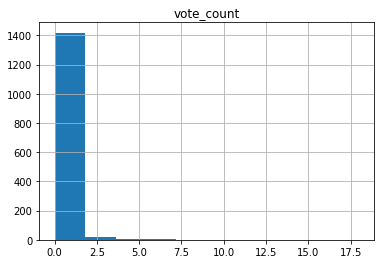

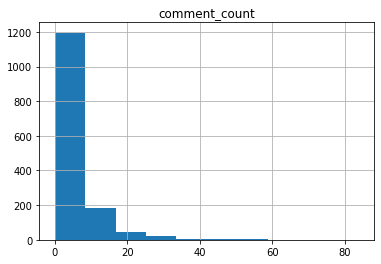

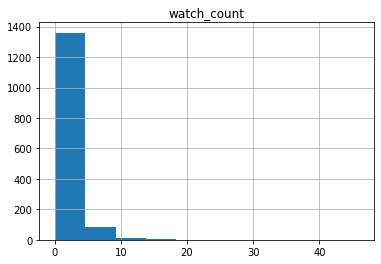

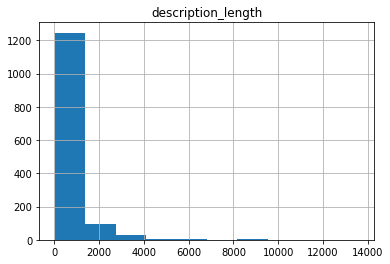

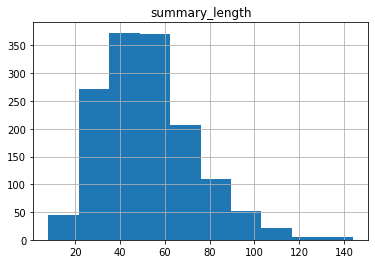

In [9]:
l=['vote_count', 'comment_count', 'watch_count', 'description_length', 'summary_length']
for i in l:
    df.hist(column=i)

Adding updatetime to the dataframe to check the relation with solutiontime in case status is Resolved and Closed 

In [190]:
dfe=df.copy()
dfe['updated'] = df['updated'].astype('datetime64')
dfe['updatetime']=dfe['updated']-dfe['created']
dfe['updatetime']=dfe['updatetime'].astype('timedelta64[s]')
dfe['updatetime']=dfe['updatetime'].multiply(1/3600)

Plot 'updatetime' vs 'solutiontime' for status=Resolved

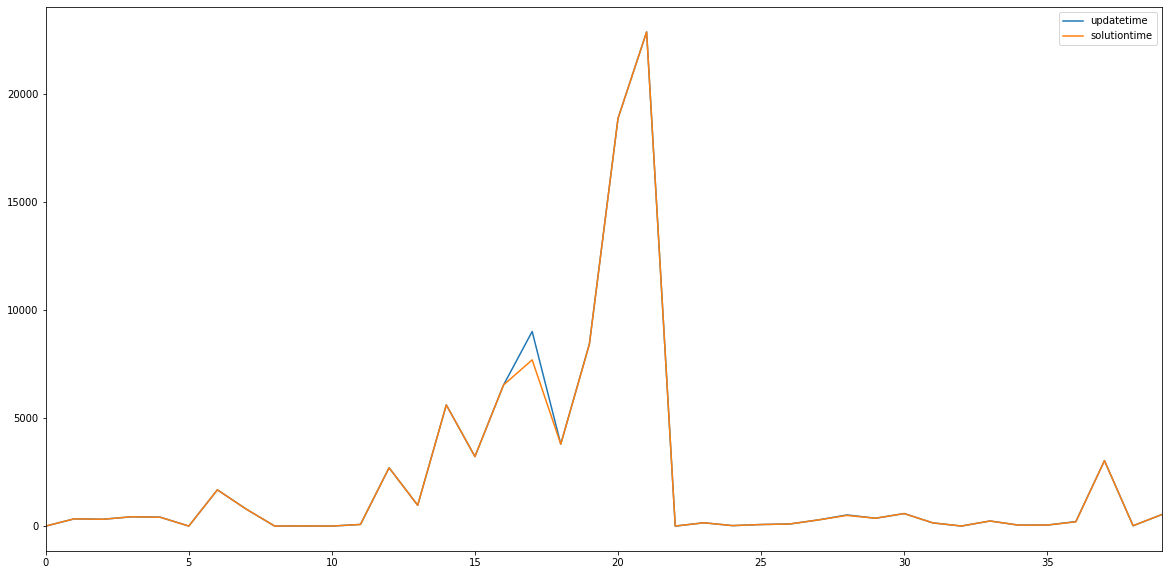

In [196]:
dfer=dfe.loc[(dfe['status'] == 'Resolved')]
dferp=dfer[['updatetime', 'solutiontime']]
dferp.reset_index(drop=True, inplace=True)
dferp.plot.line(figsize=(20,10))

Plot 'updatetime' vs 'solutiontime' for status=Closed

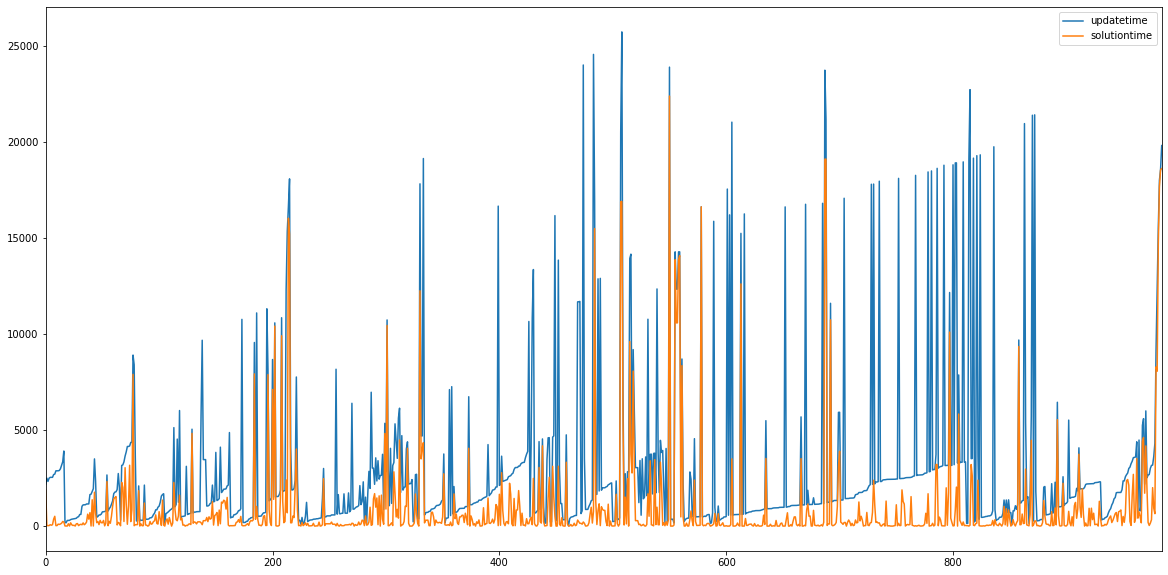

In [198]:
dfec=dfe.loc[(dfe['status'] == 'Closed') & (dfe['resolution'] == 'Fixed')]
dfecp=dfec[['updatetime', 'solutiontime']]
dfecp.reset_index(drop=True, inplace=True)
dfecp.plot.line(figsize=(20,10))

#### Separated plots are produced for status=Resolved and status=Closed

Status = Resolved

In [10]:
df_res=df.loc[df['status']=='Resolved']
print(df_res.shape)

(40, 18)


In [11]:
df_res['solutiontime'].describe()

count       40.000000
mean      2273.862215
std       4862.147280
min          0.018611
25%         46.194444
50%        325.482222
75%       1931.377222
max      22854.505278
Name: solutiontime, dtype: float64

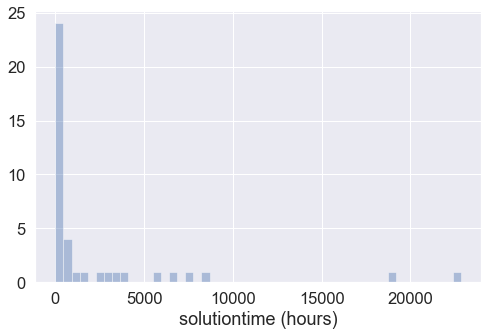

In [242]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.5)
sns.distplot(df_res['solutiontime'], norm_hist=False, kde=False, bins=50, axlabel='solutiontime (hours)')

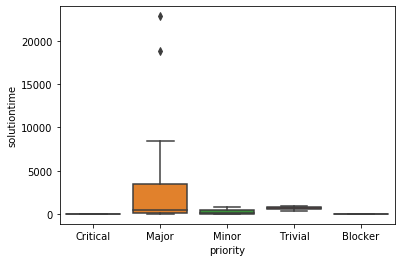

In [13]:
sns.boxplot(x="priority", y="solutiontime", data=df_res)

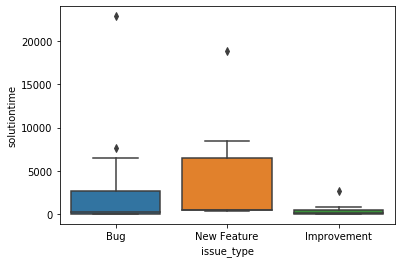

In [14]:
sns.boxplot(x="issue_type", y="solutiontime", data=df_res)

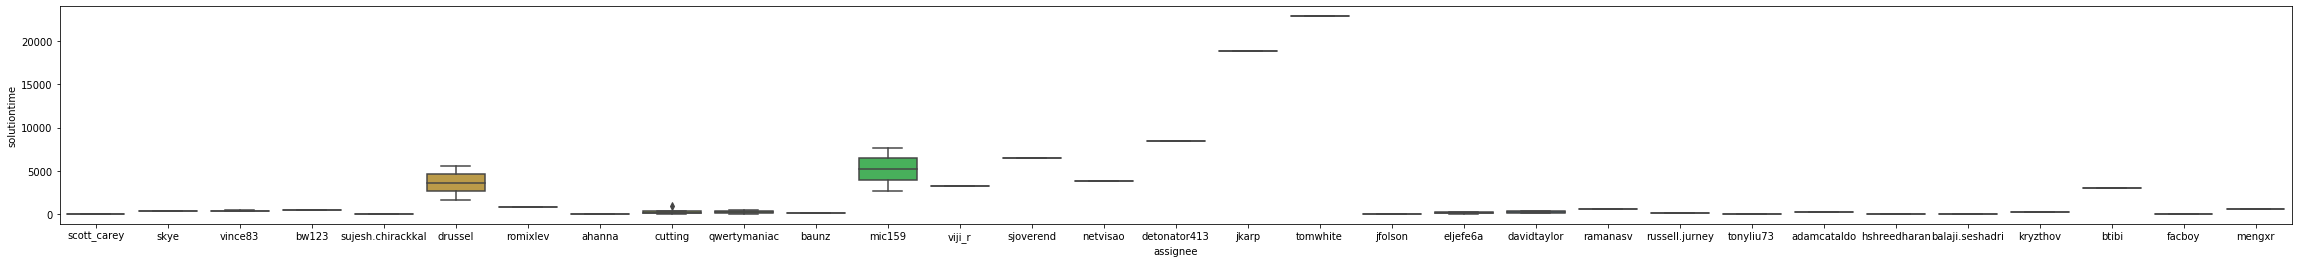

In [15]:
plt.figure(figsize=(40, 4))
sns.boxplot(x="assignee", y="solutiontime", data=df_res)

In [16]:
df_res['assignee'].value_counts()

cutting              4
eljefe6a             2
drussel              2
qwertymaniac         2
mic159               2
davidtaylor          2
vince83              2
mengxr               1
kryzthov             1
detonator413         1
romixlev             1
bw123                1
facboy               1
russell.jurney       1
viji_r               1
balaji.seshadri      1
netvisao             1
scott_carey          1
skye                 1
baunz                1
sjoverend            1
ramanasv             1
jfolson              1
adamcataldo          1
hshreedharan         1
tonyliu73            1
tomwhite             1
ahanna               1
jkarp                1
btibi                1
sujesh.chirackkal    1
Name: assignee, dtype: int64

Although not rigorous given the non-linear dependencies, Person correlations are calculated to have a rough idea of the influence of the numerical variables 

In [17]:
df_resc=df_res.drop(['priority', 'issue_type', 'reporter', 'assignee', 'status', 'resolution'], axis=1)
df_resc.corr()

,vote_count,comment_count,description_length,summary_length,watch_count,days_in_current_status,solutiontime
vote_count,1.000000,0.003791,0.407425,-0.099936,0.178009,0.108567,-0.073202
comment_count,0.003791,1.000000,-0.098560,-0.172986,0.477210,-0.226600,0.112493
description_length,0.407425,-0.098560,1.000000,0.188926,-0.135571,0.186415,-0.152096
summary_length,-0.099936,-0.172986,0.188926,1.000000,-0.079637,0.080381,0.148665
watch_count,0.178009,0.477210,-0.135571,-0.079637,1.000000,-0.233857,0.411903
days_in_current_status,0.108567,-0.226600,0.186415,0.080381,-0.233857,1.000000,0.151676
solutiontime,-0.073202,0.112493,-0.152096,0.148665,0.411903,0.151676,1.000000


### Status=Closed

In [18]:
df_clo=df.loc[(df['resolution']=='Fixed') & (df['status']!='Resolved')]
print(df_clo.shape)
print(df_clo['status'].value_counts())
df_clo.head()

(985, 18)
Closed    985
Name: status, dtype: int64


,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,comment_count,key,description_length,summary_length,watch_count,resolution,days_in_current_status,solutiontime
6,Closed,Minor,2013-08-20T17:46:04.208+0000,Improvement,bdechoux,2013-05-21 21:33:17.274,2013-08-07 19:23:23.544,0,AVRO,bdechoux,7,AVRO-1337,279.0,40,5,Fixed,180.993403,1869.835000
8,Closed,Critical,2013-08-20T17:46:04.078+0000,Bug,kirwin,2013-05-08 15:48:38.228,2013-05-09 21:04:56.888,0,AVRO,cutting,4,AVRO-1326,1025.0,45,3,Fixed,180.993404,29.271667
26,Closed,Major,2013-08-20T17:46:05.767+0000,Bug,trochee,2013-05-15 17:55:21.455,2013-05-16 17:34:16.063,0,AVRO,cutting,6,AVRO-1331,625.0,44,4,Fixed,180.993385,23.648333
27,Closed,Major,2013-08-20T17:46:03.945+0000,Improvement,hernan.otero,2013-05-08 17:05:36.288,2013-05-09 21:00:55.323,0,AVRO,cutting,4,AVRO-1327,449.0,69,3,Fixed,180.993406,27.921944
28,Closed,Major,2013-08-20T17:46:07.583+0000,Bug,massie,2013-05-06 21:26:02.931,2013-05-09 21:15:26.637,0,AVRO,massie,8,AVRO-1322,170.0,59,3,Fixed,180.993364,71.823056


In [19]:
df_clo['solutiontime'].describe()

count      985.000000
mean       922.519594
std       2571.014173
min          0.028889
25%         26.097500
50%        131.762778
75%        540.260556
max      22409.502500
Name: solutiontime, dtype: float64

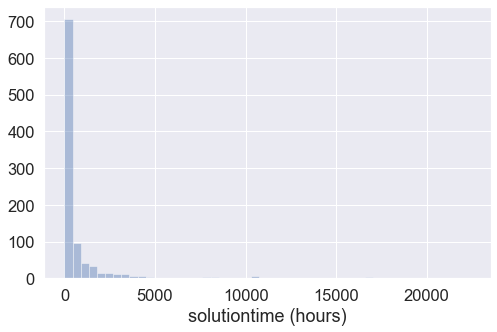

In [243]:
plt.figure(figsize=(8, 5))
sns.set(font_scale=1.5)
sns.distplot(df_clo['solutiontime'], norm_hist=False, kde=False, bins=50, axlabel='solutiontime (hours)')

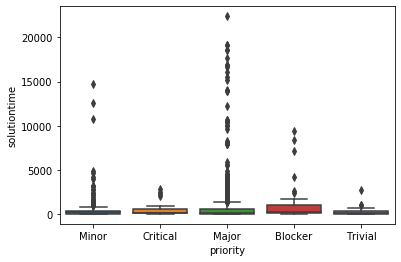

In [21]:
sns.boxplot(x="priority", y="solutiontime", data=df_clo)

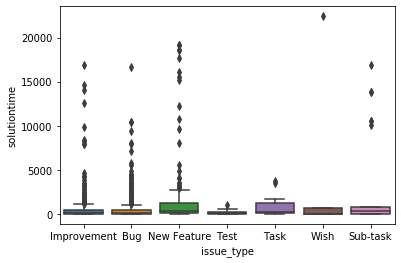

In [22]:
sns.boxplot(x="issue_type", y="solutiontime", data=df_clo)

In [23]:
df_clo['issue_type'].value_counts()

Bug            434
Improvement    360
New Feature    132
Sub-task        25
Test            17
Task            12
Wish             5
Name: issue_type, dtype: int64

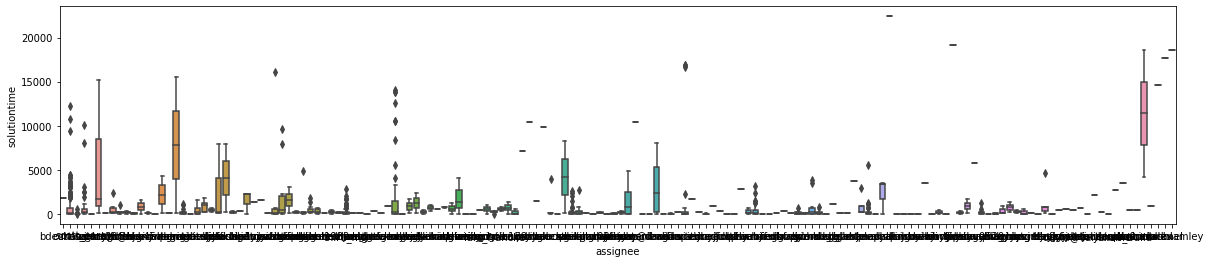

In [24]:
plt.figure(figsize=(20, 4))
sns.boxplot(x="assignee", y="solutiontime", data=df_clo)

In [25]:
df_clo['assignee'].value_counts()

cutting              260
thiru_mg              77
massie                51
dcreager              45
sbanacho              38
hammer                38
philip                37
scott_carey           36
brucem                21
jmhodges              20
jbaldassari           14
pwendell              14
tomwhite              13
sharadag              13
mpugachev             11
lmartinking            9
vnadkarni              9
sgargan                8
martinkl               7
nsabovic               7
kryzthov               6
robair                 6
alexandre.normand      6
qwertymaniac           6
gffletch               5
nagav.ashish           5
kevinoliver            5
ted.m                  5
dona                   4
saden1                 4
                    ... 
mristima               1
erikfrey               1
tucu00                 1
iocanel                1
ryanobjc               1
mlartz                 1
eljefe6a               1
jplevyak               1
bshi                   1


In [26]:
df_clo['reporter'].value_counts()

cutting                                 146
thiru_mg                                 62
hammer                                   54
massie                                   53
philip                                   41
scott_carey                              35
sbanacho                                 34
dcreager                                 29
brucem                                   27
jmhodges                                 20
vnadkarni                                13
tomwhite                                 13
sharadag                                 12
phunt                                    12
pwendell                                 12
mpugachev                                11
jbaldassari                              11
lmartinking                              11
urandom                                   8
sgargan                                   8
kevinoliver                               8
raymie                                    7
nsabovic                        

Correlation for the numerical variables (same considerations as for previous case):

In [29]:
df_cloc=df_clo.drop(['priority', 'issue_type', 'reporter', 'assignee', 'status', 'resolution'], axis=1)
df_cloc.corr()

,vote_count,comment_count,description_length,summary_length,watch_count,days_in_current_status,solutiontime
vote_count,1.000000,0.373900,0.050627,-0.065011,0.541089,-0.122031,0.382001
comment_count,0.373900,1.000000,0.174349,0.054573,0.539930,-0.198847,0.275423
description_length,0.050627,0.174349,1.000000,0.223017,0.088584,-0.180292,0.021941
summary_length,-0.065011,0.054573,0.223017,1.000000,0.000532,-0.134823,-0.046862
watch_count,0.541089,0.539930,0.088584,0.000532,1.000000,-0.442305,0.396066
days_in_current_status,-0.122031,-0.198847,-0.180292,-0.134823,-0.442305,1.000000,-0.230076
solutiontime,0.382001,0.275423,0.021941,-0.046862,0.396066,-0.230076,1.000000


### Status=Open

Quick look at the datapoints that will be excluded to the dataset because not including target values

In [30]:
df['status'].value_counts()

Closed             1094
Open                279
Patch Available      42
Resolved             40
Reopened              3
Name: status, dtype: int64

In [31]:
df_open=df.loc[df['status']=='Open']
print(df_open.shape)

(279, 18)


In [32]:
df_open['days_in_current_status'].describe()

count     279.000000
mean      838.855639
std       533.603979
min         4.865599
25%       332.344701
50%       811.308728
75%      1370.218986
max      1759.855538
Name: days_in_current_status, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025FB4E117B8>]],
      dtype=object)

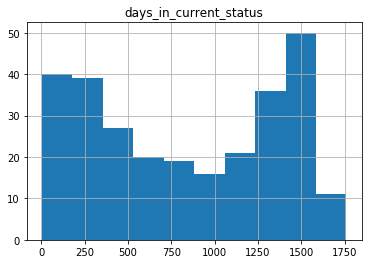

In [33]:
df_open.hist(column='days_in_current_status')

In [34]:
df_open['priority'].value_counts()

Major       211
Minor        56
Trivial       5
Critical      5
Blocker       2
Name: priority, dtype: int64

### 3. Regression

#### Dataset for regression

Unused features are removed from the original dataset. Only rows of resolved and closed issues are selected

In [35]:
df1=df.copy()
df1=df1.loc[(df1['status'] == 'Resolved') | (df1['resolution'] == 'Fixed')]

df1.drop(['created', 'resolutiondate', 'project', 'resolution', 'days_in_current_status', 'updated'], axis=1, inplace=True)
#Shuffling the dataframe because it is umbalaced with respect to 'status' (96% Closed, 4% Resolved)
df1 = df1.sample(frac=1, random_state=0).reset_index(drop=True)
print(df1.shape)
print(df1['status'].value_counts())

df1.head()

(1025, 12)
Closed      985
Resolved     40
Name: status, dtype: int64


,status,priority,issue_type,reporter,vote_count,assignee,comment_count,key,description_length,summary_length,watch_count,solutiontime
0,Closed,Major,Improvement,massie,0,massie,1,AVRO-175,312.0,75,0,51.048611
1,Closed,Major,Bug,martinkl,0,martinkl,4,AVRO-1258,150.0,47,3,6.915278
2,Closed,Major,Bug,sandyr,0,cutting,14,AVRO-1175,364.0,112,3,1487.672778
3,Closed,Major,Improvement,cutting,0,cutting,1,AVRO-731,64.0,47,0,23.500000
4,Closed,Major,Test,cos,0,cos,6,AVRO-81,303.0,63,2,145.772778


In [174]:
df1['solutiontime'].describe()

count     1025.000000
mean       975.254916
std       2705.702377
min          0.018611
25%         26.572222
50%        136.973056
75%        567.513889
max      22854.505278
Name: solutiontime, dtype: float64

#### Plotting target and numerical variables from the regression dataset

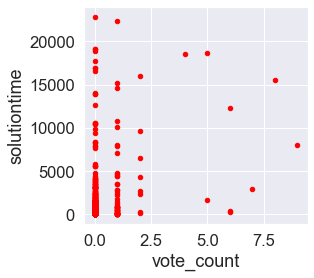

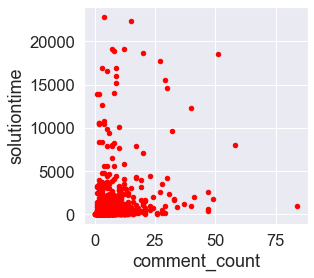

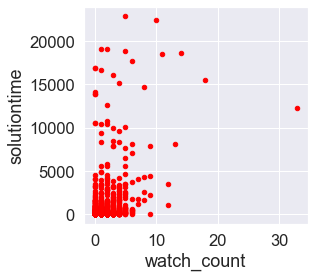

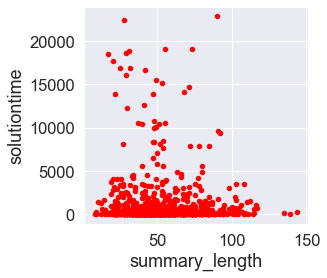

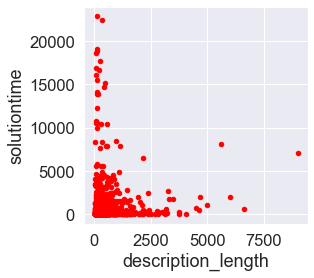

In [245]:
l=['vote_count','comment_count', 'watch_count', 'summary_length', 'description_length']
for i in l:
    df1.plot(kind='scatter', x=i, y='solutiontime',color='red', figsize=(4,4))
plt.show()

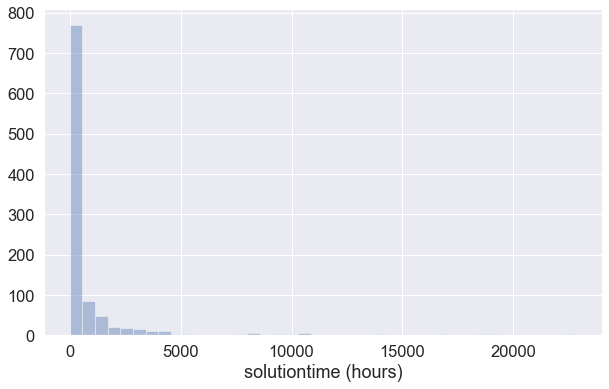

In [246]:
plt.figure(figsize=(10, 6))
sns.set(font_scale=1.5)
sns.distplot(df1['solutiontime'], norm_hist=False, kde=False, bins=40, axlabel='solutiontime (hours)')

In [38]:
import sklearn
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
import numpy

#### Random Forest Regressor

The following function first executes Grid Search on the train dataset to find the best model parametrs. It then calculates scorings on the test set.

In [67]:
def rfr_model (X_train, y_train, X_test, y_test):

    grid_search = GridSearchCV(
        estimator=RandomForestRegressor(random_state=42),
        param_grid={'max_depth': range(2,7),'n_estimators': (10, 50, 100, 500, 1000)},
        cv=5, scoring='r2', verbose=0, n_jobs=-1)
    
    grid_search.fit(X_train, y_train)
    best_parameters=grid_search.best_params_
 
    test_score=grid_search.score(X_test,y_test)
    train_score=grid_search.score(X_train,y_train)
    
    y_hat=grid_search.predict(X_test)
    mae_test=sklearn.metrics.mean_absolute_error(y_test,y_hat)
    
    return test_score, train_score, mae_test, grid_search.best_params_, grid_search.best_estimator_ 

The regression dataset is further processed with removal of other features, one-hot-encoding and vectorization of the model inputs. In oder not to depend too much on the train/test random split, the model is run for 5 different random states and results are then averaged.

In [161]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
df2=df1.drop(['solutiontime', 'key', 'description_length', 'status', 'summary_length'], axis=1)
features=pd.get_dummies(df2)
X=features.values
y=df1['solutiontime'].values

result=[]
for i in range (0,5):
     X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=i)
     scaler = preprocessing.StandardScaler().fit(X_train)
     X_train=scaler.transform(X_train)
     X_test=scaler.transform(X_test)
    
     result.append(rfr_model (X_train, y_train, X_test, y_test))
result

[(0.24857426928421333,
  0.6025491280226007,
  1194.6441051269537,
  {'max_depth': 5, 'n_estimators': 50},
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=50,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False)),
 (0.23035442360724845,
  0.6583995296639831,
  1120.6782308541858,
  {'max_depth': 6, 'n_estimators': 100},
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight

Final averaged results

In [162]:
import statistics
test_score=[]
train_score=[]
mae=[]
for i in result:
    test_score.append(i[0])
    train_score.append(i[1])
    mae.append(i[2])
print(statistics.mean(test_score))
print(statistics.stdev(test_score))
print(statistics.mean(train_score))
print(statistics.mean(mae))

0.252229085563466
0.036810371970877706
0.5921866899853655
988.5436292271236


For the prediction below it is required to select a train/test dataset. A random_state=0 from the above test run is selected because its scoring is more or less equal to the average of the five.

In [220]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=0)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)
rfr_model (X_train, y_train, X_test, y_test)

(0.24857426928421333,
 0.6025491280226007,
 1194.6441051269537,
 {'max_depth': 5, 'n_estimators': 50},
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False))

#### In order to counteract unbalance, status Resolved datapoints are oversampled simpling multiplying them until they reach almost the same count as status Closed 

In [209]:
df_resm=df_res.copy()
df_resm=pd.concat([df_resm]*23, ignore_index=True)
df_resm.drop(['created', 'resolutiondate', 'project', 'resolution', 'days_in_current_status', 'updated'], axis=1, inplace=True)
print(df_resm.shape)

(920, 12)


New regression dataset with 

In [218]:
df1m = pd.concat([df1, df_resm], axis=0)
df1m = df1m.sample(frac=1, random_state=0).reset_index(drop=True)
print(df1m.shape)
df1m.head(2)

(1945, 12)


,status,priority,issue_type,reporter,vote_count,assignee,comment_count,key,description_length,summary_length,watch_count,solutiontime
0,Closed,Major,Improvement,cutting,0,cutting,2,AVRO-756,267.0,75,0,477.594444
1,Resolved,Trivial,Bug,logicnut,0,cutting,1,AVRO-1224,384.0,30,2,963.645556


In [223]:
df1m['status'].value_counts()

Closed      985
Resolved    960
Name: status, dtype: int64

#### The model is re-run over the resampled dataset with same procedure as previously done

In [225]:
df2m=df1m.drop(['solutiontime', 'key', 'description_length', 'status', 'summary_length'], axis=1)
featuresm=pd.get_dummies(df2m)
Xm=featuresm.values
ym=df1m['solutiontime'].values

resultm=[]
for i in range (0,5):
  Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xm, ym, test_size=0.2, random_state=i)
  scaler = preprocessing.StandardScaler().fit(Xm_train)
  Xm_train=scaler.transform(Xm_train)
  Xm_test=scaler.transform(Xm_test)
  resultm.append(rfr_model (Xm_train, ym_train, Xm_test, ym_test))
resultm

[(0.8119687956854326,
  0.864648620448315,
  854.1807808743645,
  {'max_depth': 6, 'n_estimators': 500},
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=500,
                        n_jobs=None, oob_score=False, random_state=42, verbose=0,
                        warm_start=False)),
 (0.8392951358893714,
  0.8735154826346762,
  811.0011999746539,
  {'max_depth': 6, 'n_estimators': 500},
  RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fr

In [226]:
import statistics
test_scorem=[]
train_scorem=[]
maem=[]
for i in resultm:
    test_scorem.append(i[0])
    train_scorem.append(i[1])
    maem.append(i[2])
print(statistics.mean(test_scorem))
print(statistics.stdev(test_scorem))
print(statistics.mean(train_scorem))
print(statistics.mean(maem))

0.803627428491222
0.03282883701543261
0.8688472099846964
840.3877299573638


In [234]:
Xm_train, Xm_test, ym_train, ym_test = train_test_split( Xm, ym, test_size=0.2, random_state=0)
scaler = preprocessing.StandardScaler().fit(Xm_train)
Xm_train=scaler.transform(Xm_train)
Xm_test=scaler.transform(Xm_test)
rfr_model (Xm_train, ym_train, Xm_test, ym_test)

(0.8119687956854326,
 0.864648620448315,
 854.1807808743645,
 {'max_depth': 6, 'n_estimators': 500},
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False))

In [236]:
rfrm = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

rfrm.fit(Xm_train,ym_train)
ym_hat=rfr.predict(Xm_test)

### 4. Prediction of three interesting cases 

Prediction errors are examined for the max, min and median target values.

In [142]:
rfr=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,warm_start=False)

rfr.fit(X_train,y_train)
errors=[]
case=[numpy.max(y_test), numpy.median(y_test), numpy.min(y_test)]
ids=[]
errors={}
for i in case:
    dfid=df1.loc[df1['solutiontime']==i]
    ID=dfid['key'].values[0]
    ids.append(ID)
    idx=numpy.where(y_test==i)
    y_hat=rfr.predict(X_test)[idx]
    err=i-y_hat
    errors[ID]=err
    
print(errors)
print(ids)

{'AVRO-575': array([21889.48746251]), 'AVRO-1199': array([-416.49179819]), 'AVRO-107': array([-508.55234916])}
['AVRO-575', 'AVRO-1199', 'AVRO-107']


In [146]:
df_1=df.loc[df['key']=='AVRO-575']
df_1

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,comment_count,key,description_length,summary_length,watch_count,resolution,days_in_current_status,solutiontime
753,Resolved,Major,2013-01-21T11:03:14.570+0000,Bug,tomwhite,2010-06-14 04:32:54.901,2013-01-21 11:03:14.550,0,AVRO,tomwhite,4,AVRO-575,114.0,90,5,Not A Problem,392.273145,22854.505278


In [147]:
df_2=df.loc[df['key']=='AVRO-1199']
df_2

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,comment_count,key,description_length,summary_length,watch_count,resolution,days_in_current_status,solutiontime
116,Closed,Major,2012-12-10T17:57:35.373+0000,Bug,kimslbing,2012-11-08 07:32:06.572,2012-11-14 23:21:59.645,0,AVRO,cutting,8,AVRO-1199,835.0,72,2,Fixed,433.985403,159.831389


In [148]:
df_3=df.loc[df['key']=='AVRO-107']
df_3

,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,comment_count,key,description_length,summary_length,watch_count,resolution,days_in_current_status,solutiontime
1222,Closed,Minor,2009-09-16T22:31:46.619+0000,Bug,cutting,2009-08-27 22:21:21.535,2009-08-27 22:25:14.112,0,AVRO,cutting,1,AVRO-107,180.0,73,0,Fixed,1614.794997,0.064444


#### Looking at absolute error distribution for the first and resampled models

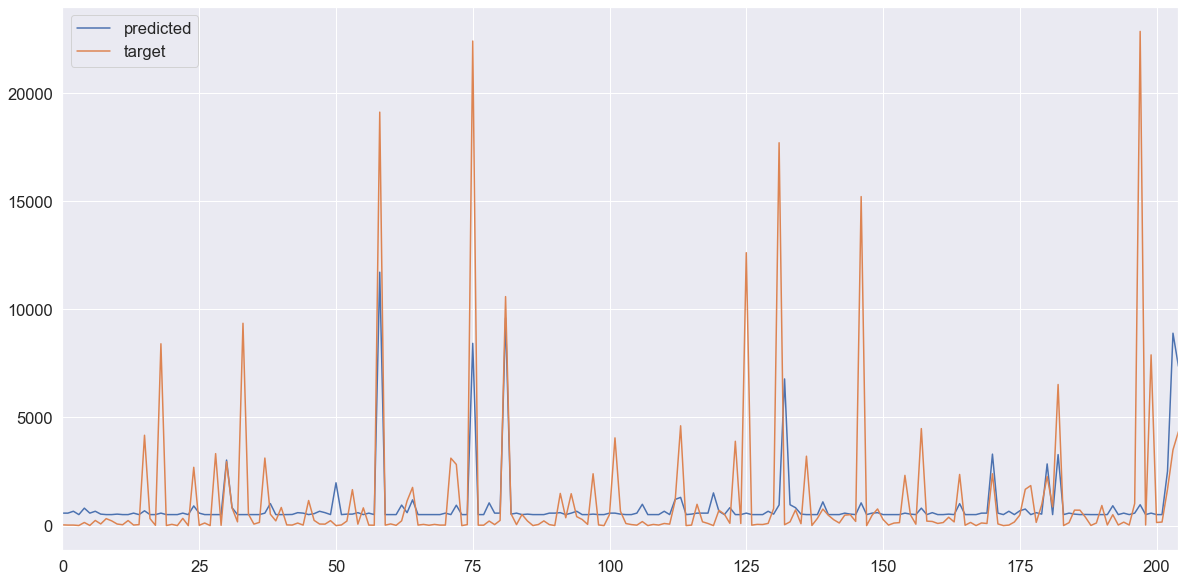

In [265]:
y_hat=rfr.predict(X_test)
results = pd.DataFrame({'predicted': y_hat, 'target': y_test})
results.plot.line(figsize=(20,10))

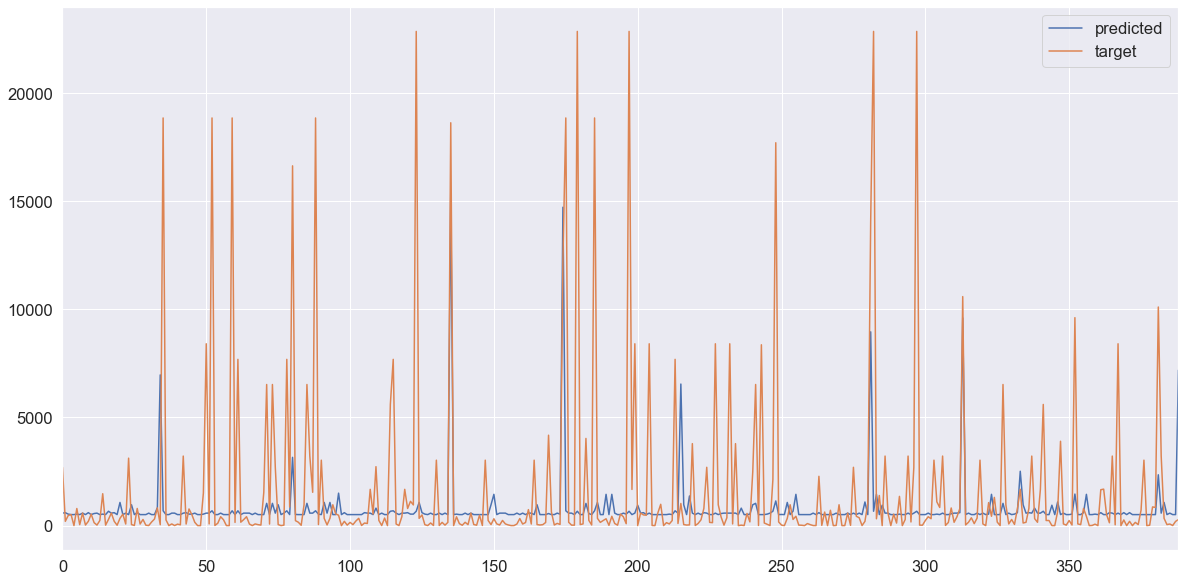

In [264]:
resultsm = pd.DataFrame({'predicted': ym_hat, 'target': ym_test})
resultsm.plot.line(figsize=(20,10))

### 5. Importing the original json file and extract more features to try improve the model

In [149]:
import json

In [150]:
dfj = pd.read_json('avro-issues.json', lines=True)
print(dfj.shape)
dfj.head(2)

(1458, 13)


,_id,changelog,editmeta,expand,fields,id,key,names,operations,renderedFields,schema,self,transitions
0,AVRO-1350,"{'total': 2, 'startAt': 0, 'histories': [{'ite...",{'fields': {}},"renderedFields,names,schema,transitions,operat...","{'comment': {'total': 2, 'startAt': 0, 'maxRes...",12655581,AVRO-1350,"{'comment': 'Comment', 'aggregatetimeestimate'...","{'linkGroups': [{'links': [], 'id': 'view.issu...","{'comment': {'total': 2, 'startAt': 0, 'maxRes...","{'comment': {'items': 'comment', 'type': 'arra...",https://issues.apache.org/jira/rest/api/2/issu...,[]
1,AVRO-1349,"{'total': 1, 'startAt': 0, 'histories': [{'ite...",{'fields': {}},"renderedFields,names,schema,transitions,operat...","{'comment': {'total': 2, 'startAt': 0, 'maxRes...",12653964,AVRO-1349,"{'comment': 'Comment', 'aggregatetimeestimate'...","{'linkGroups': [{'links': [], 'id': 'view.issu...","{'comment': {'total': 2, 'startAt': 0, 'maxRes...","{'comment': {'items': 'comment', 'type': 'arra...",https://issues.apache.org/jira/rest/api/2/issu...,[]


#### Extraction of the variable 'component'

In [151]:
comp=[]
for i in range (0,1458):
    if len(dfj['fields'][i]['components'])>0:
       component=dfj['fields'][i]['components'][0]['name']
       comp.append(component)
    else:
        comp.append('None')
print(len(comp))
print(comp.count('None'))

1458
90


In [153]:
df_comp=pd.DataFrame(comp, columns=['component'])

#### Extraction of the variable 'version'. Due to the high amount of missing values it will be discarded and not used further.

In [154]:
ver=[]
for i in range (0,1458):
    if len(dfj['fields'][i]['versions'])>0:
       version=dfj['fields'][i]['versions'][0]['name']
       ver.append(version)
    else:
        ver.append('None')
print(len(ver))
print(ver.count('None'))

1458
748


#### Extraction of the total number of updates

In [155]:
logs=[]
for i in range (0,1458):
    a=dfj['changelog'][i]['total']
    logs.append(a)
    
print(len(logs)) 

1458


In [156]:
df_logs=pd.DataFrame(logs, columns=['logs'])
df_logs['logs'].value_counts()

5     254
4     231
6     163
3     152
2     119
7     112
0      88
1      83
8      68
9      63
10     39
11     23
12     20
13     14
14      7
15      4
16      4
17      3
18      3
19      3
21      2
22      1
20      1
27      1
Name: logs, dtype: int64

#### Merging the two new column features with the regression dataset

In [157]:
df3 = pd.merge(df1, df_comp, left_index=True, right_index=True)
#The missing component values are replaced with the fost frequent one
df3['component'] = df3['component'].replace(['None'],'java')
df5 = pd.merge(df3, df_logs, left_index=True, right_index=True)
print(df5.shape)
df5.head(1)

(1025, 14)


,status,priority,issue_type,reporter,vote_count,assignee,comment_count,key,description_length,summary_length,watch_count,solutiontime,component,logs
0,Closed,Major,Improvement,massie,0,massie,1,AVRO-175,312.0,75,0,51.048611,c++,2


Checking impact of the new varianles on the target

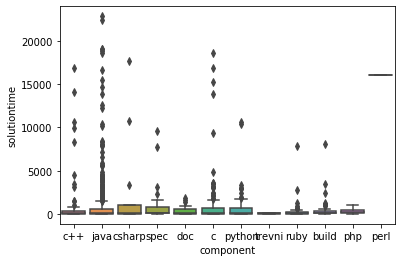

In [158]:
sns.boxplot(x="component", y="solutiontime", data=df5)

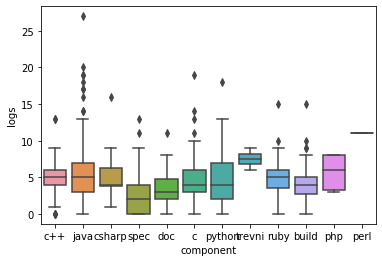

In [159]:
sns.boxplot(x="component", y="logs", data=df5)

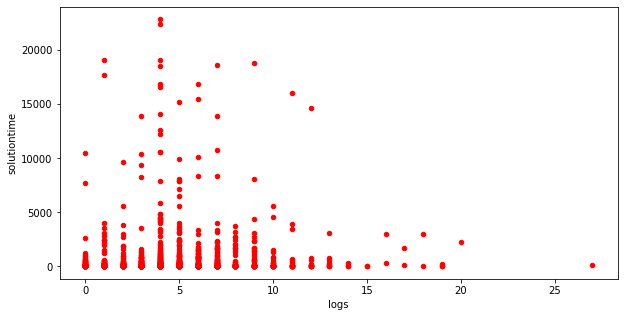

In [160]:
df5.plot(kind='scatter', x='logs', y='solutiontime',color='red', figsize=(10,5))
plt.show()

Shuffling the new dataframe

In [163]:
df6 = df5.sample(frac=1,random_state=0).reset_index(drop=True)

In [164]:
df6.head(2)

,status,priority,issue_type,reporter,vote_count,assignee,comment_count,key,description_length,summary_length,watch_count,solutiontime,component,logs
0,Closed,Minor,Bug,lmoss,0,lmoss,2,AVRO-1131,667.0,73,2,33.691389,java,5
1,Closed,Major,Bug,szesch,0,cutting,4,AVRO-1309,835.0,51,3,23.738333,java,4


#### The model is run on the new dataset including the additional two features

In [180]:
df7=df6.drop(['solutiontime', 'key', 'description_length', 'status', 'summary_length', 'component'], axis=1)
features1=pd.get_dummies(df7)
X1=features1.values
y1=df6['solutiontime'].values

X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.2, random_state=0)
scaler = preprocessing.StandardScaler().fit(X1_train)
X1_train=scaler.transform(X1_train)
X1_test=scaler.transform(X1_test)

print(X1_train.shape)

(820, 418)


In [181]:
rfr_model (X1_train, y1_train, X1_test, y1_test)

(0.20470650021768222,
 0.5263551666483637,
 1070.7039420246513,
 {'max_depth': 4, 'n_estimators': 500},
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False))

### 6. Adding the two new features to the initial original data set and saving it to a new csv file

In [171]:
df_ = pd.merge(df, df_comp, left_index=True, right_index=True)
#The missing component values are replaced with the most frequent one
df_['component'] = df_['component'].replace(['None'],'java')
df_updated = pd.merge(df_, df_logs, left_index=True, right_index=True)
df_updated.drop(['solutiontime'], axis=1, inplace=True)
print(df_updated.shape)
df_updated.head(1)

(1458, 19)


,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,comment_count,key,description_length,summary_length,watch_count,resolution,days_in_current_status,component,logs
0,Open,Major,2013-07-02T02:33:35.279+0000,Bug,keyer,2013-07-01 11:38:36.150,NaT,0,AVRO,NaN,2,AVRO-1350,3042.0,46,1,NaN,231.248588,c++,2


In [172]:
df_updated.to_csv('avro-issues_updated.csv', index=False)

Checking that the newly created csv file looks correct

In [173]:
a=pd.read_csv('avro-issues_updated.csv')
print(a.shape)
a.head()

(1458, 19)


,status,priority,updated,issue_type,reporter,created,resolutiondate,vote_count,project,assignee,comment_count,key,description_length,summary_length,watch_count,resolution,days_in_current_status,component,logs
0,Open,Major,2013-07-02T02:33:35.279+0000,Bug,keyer,2013-07-01 11:38:36.150,NaN,0,AVRO,NaN,2,AVRO-1350,3042.0,46,1,NaN,231.248588,c++,2
1,Resolved,Critical,2013-06-20T16:41:00.043+0000,Bug,scott_carey,2013-06-20 16:29:17.709,2013-06-20 16:41:00.024,0,AVRO,scott_carey,2,AVRO-1349,41.0,43,2,Fixed,242.038590,java,1
2,Resolved,Major,2013-06-20T17:38:07.697+0000,Bug,skye,2013-06-06 17:41:12.389,2013-06-20 17:18:00.789,0,AVRO,skye,6,AVRO-1346,528.0,55,6,Fixed,242.012886,c++,6
3,Open,Minor,2013-05-30T22:07:02.491+0000,Improvement,davidtaylor,2013-05-30 22:02:52.515,NaN,0,AVRO,NaN,1,AVRO-1342,312.0,44,1,NaN,262.815066,csharp,1
4,Open,Minor,2013-05-25T05:35:30.283+0000,Improvement,jdonofrio,2013-05-25 05:35:30.283,NaN,0,AVRO,NaN,0,AVRO-1340,559.0,97,1,NaN,268.500740,spec,0
